In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile 
import sqlite3
%matplotlib inline

In [2]:
with open('data/rt.movie_info.tsv.gz') as f:
    print(f)
with open('data/rt.reviews.tsv.gz') as f:
    print(f)
with open('data/im.db.zip') as f:
    print(f)
with open('data/tmdb.movies.csv.gz') as f:
    print(f)
with open('data/tn.movie_budgets.csv.gz') as f:
    print(f)

<_io.TextIOWrapper name='data/rt.movie_info.tsv.gz' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='data/rt.reviews.tsv.gz' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='data/im.db.zip' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='data/tmdb.movies.csv.gz' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='data/tn.movie_budgets.csv.gz' mode='r' encoding='cp1252'>


In [3]:
#Load movie info from Rotten Tomatoes
rt_movie_df = pd.read_csv('data/rt.movie_info.tsv.gz',delimiter = '\t')

#Create list of genres for each record
rt_movie_df['genre list'] = rt_movie_df['genre'].str.split('|')

rt_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
 12  genre list    1552 non-null   object
dtypes: int64(1), object(12)
memory usage: 158.6+ KB


'currency' and 'box_office' columns are about 4/5 empty. Dropping these columns. Other datasets are complete and this data can be gathered from there instead

In [4]:
rt_movie_df.drop(['currency','box_office'], axis =1,inplace=True)

In [5]:
rt_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   runtime       1530 non-null   object
 9   studio        494 non-null    object
 10  genre list    1552 non-null   object
dtypes: int64(1), object(10)
memory usage: 134.2+ KB


In [6]:
#Load review info from Rotten Tomatoes
rt_review_df = pd.read_csv('data/rt.reviews.tsv.gz',delimiter='\t',encoding = 'unicode_escape')
rt_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [7]:
#Extract imdb sql DB
with zipfile.ZipFile('data/im.db.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path='data/')

In [8]:
#Connect to IMDB DB and get schema
con = sqlite3.connect('data/im.db')
pd.read_sql("""

SELECT *
FROM sqlite_master

""",con)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [9]:
#Load 'The Movie DB' dataset
tmdb_df = pd.read_csv('./data/tmdb.movies.csv.gz')
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [10]:
#Load 'The Numbers' dataset
tn_df = pd.read_csv('./data/tn.movie_budgets.csv.gz')
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Creating a master revenue dataset

### Working with dataset from 'The-Numbers.com'
 The dataset has no null values and includes columns for production_budget, domestic_gross and worldwide_gross however, they are all strings. First lets confirm that all numbers are dealing in the same currency ('$')


In [11]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [12]:
print("Is the production budget in dollars for all records?: ",tn_df['worldwide_gross'].str.startswith('$').sum() == len(tn_df))
print("Is the domestic gross in dollars for all records?: ",tn_df['domestic_gross'].str.startswith('$').sum() == len(tn_df))
print("Is the worldwide gross in dollars for all records?: ",tn_df['worldwide_gross'].str.startswith('$').sum() == len(tn_df))

Is the production budget in dollars for all records?:  True
Is the domestic gross in dollars for all records?:  True
Is the worldwide gross in dollars for all records?:  True


It looks all the business related data is in dollars. We can safely convert all the numbers without having to do any currency conversions. To ensure we don't lose track, a currency column is created to include the "$" symbol and all numbers are then proceeded to be converted to floats

In [13]:
#Converting production buget, domestic gross, worldwide gross to numbers, Add currency unit column as a reminder 
#numbers are in $
tn_df['currency'] = '$'
tn_df['production_budget'] = tn_df['production_budget'].str.replace(',','').str.replace('$','').astype(int)
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',','').str.replace('$','').astype(int)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',','').str.replace('$','').astype('int64')

Using these we can generate overall profit a movie has made and also generate a hit/flop column for each movie

 Note: Worldwide gross constitutes domestic gross

In [14]:
#Adding net revenue column and a foreign gross column
tn_df['foreign_gross'] = tn_df['worldwide_gross'] - tn_df['domestic_gross']
tn_df['net_revenue'] = tn_df['worldwide_gross'] - tn_df['production_budget']

Converting release_date to date time

In [15]:
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])
tn_df['release_year'] = tn_df['release_date'].dt.year
tn_df['release_month'] = tn_df['release_date'].dt.month
tn_df['release_day'] = tn_df['release_date'].dt.day

Creating a key on which joins and merges will be made. This will be a string comprising the movie title and the release year.

In [16]:
tn_df['merge_key'] = tn_df['movie'] + " ("+ tn_df['release_date'].dt.year.astype(str)+")"

Limiting data to post 2010. This will help us to value recent trends 

In [17]:
last_10yrs_df = tn_df[tn_df['release_year']>2010]

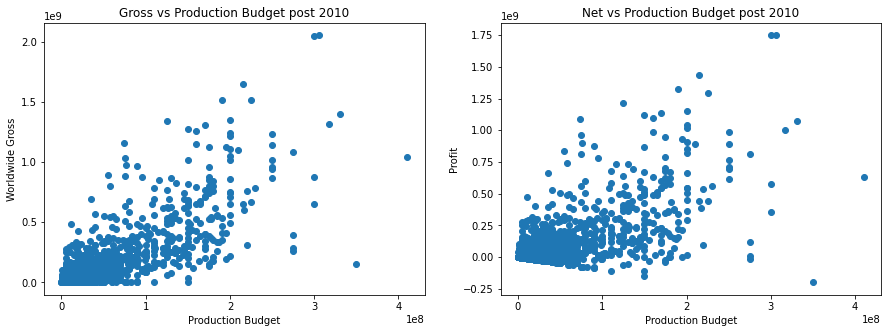

In [18]:
fig,ax = plt.subplots(1,2,figsize = (15,5))

ax[0].scatter(x = last_10yrs_df['production_budget'], y = last_10yrs_df['worldwide_gross'])
ax[0].set_xlabel('Production Budget')
ax[0].set_ylabel('Worldwide Gross')
ax[0].set_title('Gross vs Production Budget post 2010');

ax[1].scatter(x = last_10yrs_df['production_budget'], y = last_10yrs_df['net_revenue'])
ax[1].set_xlabel('Production Budget')
ax[1].set_ylabel('Profit')
ax[1].set_title('Net vs Production Budget post 2010');

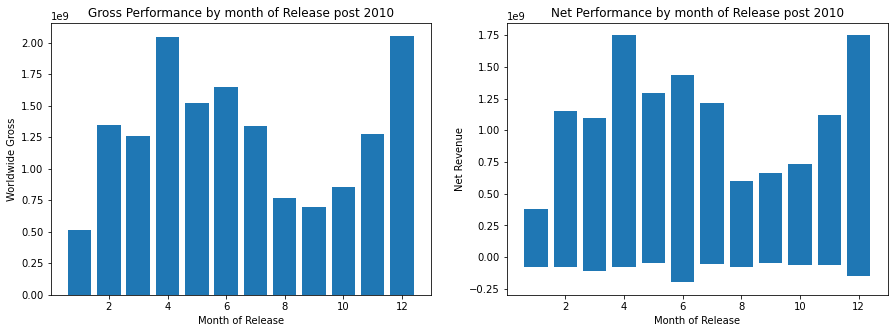

In [19]:
fig,ax = plt.subplots(1,2,figsize = (15,5))

ax[0].bar(x = last_10yrs_df['release_month'], height = last_10yrs_df['worldwide_gross'])
ax[0].set_xlabel('Month of Release')
ax[0].set_ylabel('Worldwide Gross')
ax[0].set_title('Gross Performance by month of Release post 2010');

ax[1].bar(x = last_10yrs_df['release_month'], height = last_10yrs_df['net_revenue'])
ax[1].set_xlabel('Month of Release')
ax[1].set_ylabel('Net Revenue')
ax[1].set_title('Net Performance by month of Release post 2010');

In [20]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int32         
 4   domestic_gross     5782 non-null   int32         
 5   worldwide_gross    5782 non-null   int64         
 6   currency           5782 non-null   object        
 7   foreign_gross      5782 non-null   int64         
 8   net_revenue        5782 non-null   int64         
 9   release_year       5782 non-null   int64         
 10  release_month      5782 non-null   int64         
 11  release_day        5782 non-null   int64         
 12  merge_key          5782 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(7), object(3)
memory usag

### Working with the BoxOfficeMojo dataset
Loading the boxofficemojo.com dataset

In [21]:
box_office_df = pd.read_csv('./data/bom.movie_gross.csv.gz')
box_office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


There are a few empty values in the studio column. Filling these with 'Unknown'.

In [22]:
box_office_df['studio'] = box_office_df['studio'].fillna('Unknown') 

Note there are a few empty values in the domestic and foreign gross columns. We'll have to employ slightly different approaches to these datas. 

Create new columns to prevent writing over data.
na values in domestic gross will be replaced with 0
na values in foreign gross will be replaced with 0 as well. Note however that numbers in foreign sometimes include a ','. Specifically 5 records hold such values. 

In [23]:
box_office_df[box_office_df['foreign_gross'].fillna('0').str.contains(',')]

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
1874,Furious 7,Uni.,353000000.0,"1,163.0",2015
2760,The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018


These values will need to be multiplied by 10^6 to match with the rest of the revenue data

In [24]:
box_office_df['domestic_gross'] = box_office_df['domestic_gross'].fillna(0) 
box_office_df['foreign_gross'] = box_office_df['foreign_gross'].fillna('0')
box_office_df['foreign_gross'] = box_office_df['foreign_gross'].map(lambda x: 
                                                                            float(x) if ',' not in x
                                                                            else float(x.replace(',',''))*1000000).astype(int)

In [25]:
len(box_office_df[box_office_df['domestic_gross'].isna() & box_office_df['foreign_gross'].isna()])

0

In [26]:
box_office_df.rename(columns={'domestic_gross':'domestic_gross_bom','foreign_gross':'foreign_gross_bom',},inplace=True)

Creating a key on which joins and merges will be made. This will be a string comprising the movie title and the release year.

In [27]:
box_office_df['merge_key'] = box_office_df['title'] + " ("+ box_office_df['year'].astype(str)+")"

In [28]:
box_office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               3387 non-null   object 
 1   studio              3387 non-null   object 
 2   domestic_gross_bom  3387 non-null   float64
 3   foreign_gross_bom   3387 non-null   int32  
 4   year                3387 non-null   int64  
 5   merge_key           3387 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 145.7+ KB


## Making a master DF for revenue
### Merging datasets from the-numbers.com and boxofficemojo.com

In [29]:
tn_df.rename(columns={'production_budget':'budget_thenum','domestic_gross':'domestic_gross_thenum',
                      'worldwide_gross':'worldwide_gross_thenum',
                     'foreign_gross':'foreign_gross_thenum','net_revenue':'net_revenue_thenum'},inplace=True)

In [30]:
final = tn_df.merge(box_office_df, how='inner', left_on = 'merge_key',right_on = 'merge_key',suffixes = ('_thenum', '_bom'))

In [31]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215 entries, 0 to 1214
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      1215 non-null   int64         
 1   release_date            1215 non-null   datetime64[ns]
 2   movie                   1215 non-null   object        
 3   budget_thenum           1215 non-null   int32         
 4   domestic_gross_thenum   1215 non-null   int32         
 5   worldwide_gross_thenum  1215 non-null   int64         
 6   currency                1215 non-null   object        
 7   foreign_gross_thenum    1215 non-null   int64         
 8   net_revenue_thenum      1215 non-null   int64         
 9   release_year            1215 non-null   int64         
 10  release_month           1215 non-null   int64         
 11  release_day             1215 non-null   int64         
 12  merge_key               1215 non-null   object  

In [33]:
final['year'].min()

2010

In [32]:
final[(final['domestic_gross_thenum']==0) & (final['domestic_gross_bom']!=0)][['movie','domestic_gross_thenum','domestic_gross_bom',
                                                                              'foreign_gross_thenum','foreign_gross_bom',
                                                                              'worldwide_gross_thenum']]

,movie,domestic_gross_thenum,domestic_gross_bom,foreign_gross_thenum,foreign_gross_bom,worldwide_gross_thenum
763,Wolves,0,12100.0,94953,0,94953
822,Khumba,0,1000.0,20898221,27200000,20898221
1085,Anna,0,4300.0,1200000,0,1200000
1202,They Will Have to Kill Us First,0,7500.0,7943,0,7943
